# HR Analytics : Job Change of Data Scientists
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

## Features
- enrollee_id : (idx, 이산) 후보자 고유 ID
- city: (범주) 도시 코드
- city_ development _index : (이산) 도시 개발  지수
- gender: (범주) 후보자의 성별
- relevent_experience: (범주) 관련 경험 유/무
- enrolled_university: (범주) 대학 입학 여부
- education_level: (범주) 지원자의 교육 수준
    - Primary School    초등학교 졸업
    - High School       중/고등학교 졸업
    - Graduate          학사
    - Masters           석사
    - Phd               박사
- major_discipline : (범주) 주전공
- experience: (범주) 경력(년)
- company_size: (범주) 현재 회사의 직원 수
- company_type : (범주) 현재 회사 타입
    - Pvt Ltd 비상장회사
    - Funded Startup 투자받은 스타트업
    - Public Sector 공기업
    - Early Stage Startup 초기 스타트업
    - NGO  non-governmental organization 비정부기구
- last_new_job: (범주) 현재 직장 직전 공백기
- training_hours: (범주) 교육이수시간
- target: 이직희망여부 0 – 이직을 찾고 있지 않음, 1 – 이직을 찾고 있음

In [350]:
import numpy as np
import pandas as pd
import seaborn as sns

In [351]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [352]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, make_scorer,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action = 'ignore')

In [353]:
test = pd.read_csv('aug_test.csv')
train = pd.read_csv('aug_train.csv')
submission = pd.read_csv('sample_submission.csv')

In [354]:
# submission.head()

## 한글 처리

In [355]:
mpl.get_cachedir()

'C:\\Users\\GREEN\\.matplotlib'

In [356]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'malg' in f.name.lower()]

[('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf')]

In [357]:
mpl.matplotlib_fname()

'C:\\Users\\GREEN\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [358]:
font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
mpl.rcParams["font.family"] = font_name
mpl.rcParams["font.size"] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.unicode_minus'] = False

## EDA
- 참고: https://3months.tistory.com/325

In [359]:
# 컬럼명 번역
# col_to_kor = {
#     'enrollee_id' : '고유_ID',
#     'city': '도시코드',
#     'city_development_index' : '도시개발지수(scaled)',
#     'gender': '성별',
#     'relevent_experience': '관련경험',
#     'enrolled_university': '대학유형(있는 경우)',
#     'education_level': '학력',
#     'major_discipline' : '전공',
#     'experience': '연단위_경력',
#     'company_size': '현재_직장_직원_수',
#     'company_type' : '현재_직장_고용주_유형',
#     'last_new_job': '현재_직장_직전_공백기',
#     'training_hours': '교육이수시간',
#     'target': '이직_희망여부'
# }
# data.rename(columns=col_to_kor, inplace=True)

In [360]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [361]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [362]:
# 데이터의 Null 값을 체크
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [363]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [364]:
# 수치형(이산형) 데이터 확인
# category_feature
category_feature = ['gender','relevent_experience', 'enrolled_university',
                    'education_level', 'major_discipline', 'experience',
                    'company_size', 'company_type', 'last_new_job']
numerical_feature = ['city_development_index','training_hours']

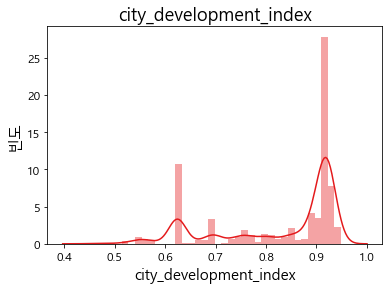

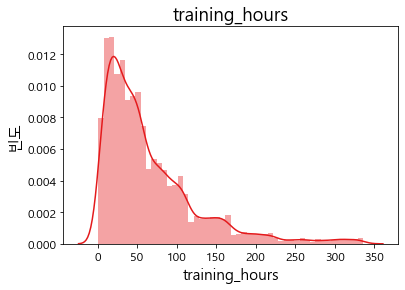

In [365]:
for nf in numerical_feature:
    sns.distplot(train.loc[train[nf].notnull(), nf])
#     sns.distplot(train[nf])
    plt.ylabel('빈도')
    plt.title(nf)
    plt.show()

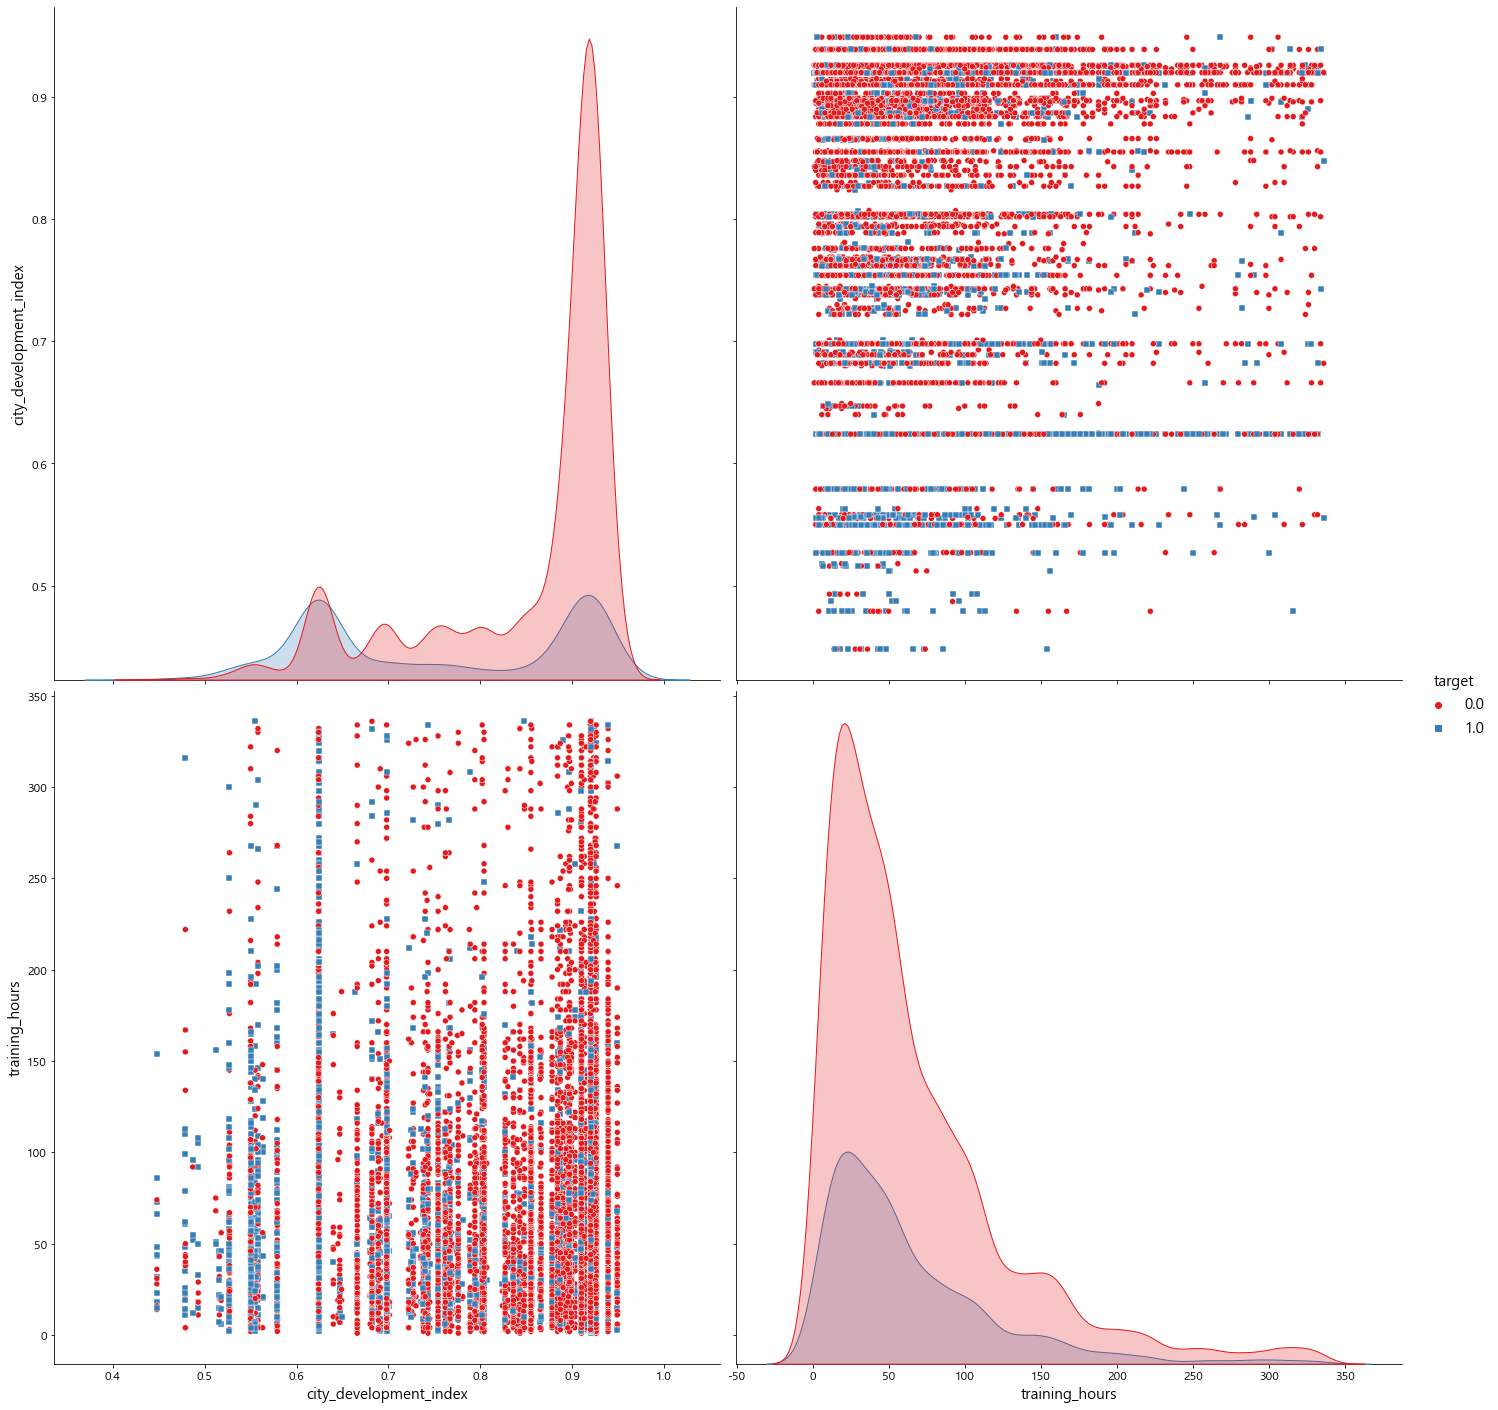

In [366]:
# numeric변수와 target과의 관계
diff = ['city_development_index', 'training_hours']

sns.pairplot(train[diff + ['target']], hue = 'target', x_vars = diff, y_vars = diff,markers=["o", "s"], height=10)
# sns.pairplot(train[diff + ['target']], hue = 'target', x_vars = diff, y_vars = diff, kind = 'hist', height=10)
plt.show()

In [367]:
# 범주형 데이터 확인
for c in train.columns:
    if c == 'enrollee_id' or c == 'city_development_index' or c == 'training_hours' or c == 'target':
        continue
    print(f'😎column : {c}')
    # columns별 unique, Nan 비율
#     print(train[c].value_counts(normalize=True, dropna=False))
    print(train[c].value_counts(dropna=False))

😎column : city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64
😎column : gender
Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64
😎column : relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
😎column : enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64
😎column : education_level
Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64
😎column : major_discipline
STEM               14492
NaN                 2813
Humanities           669
Other                381
Business 

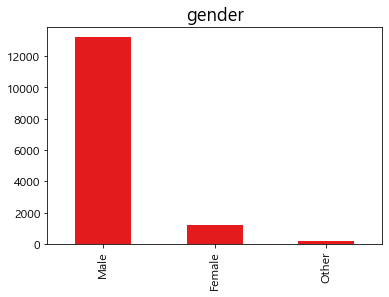

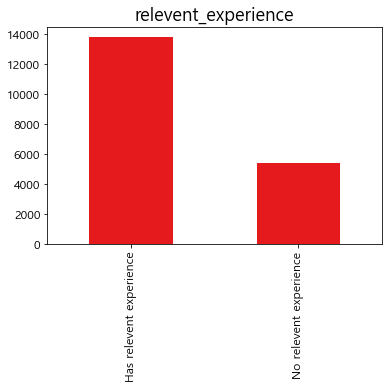

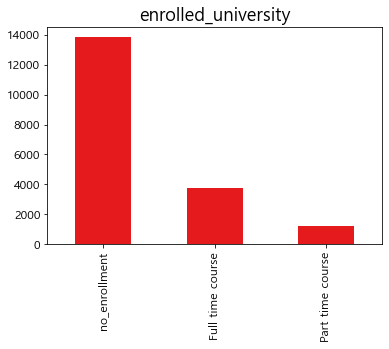

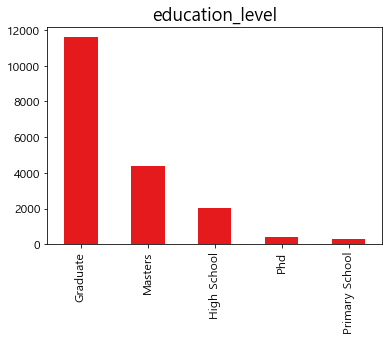

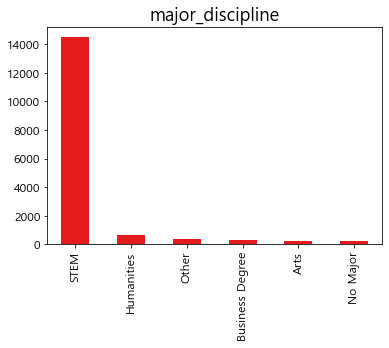

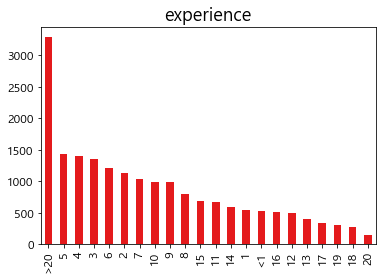

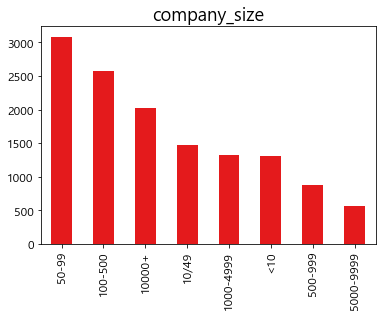

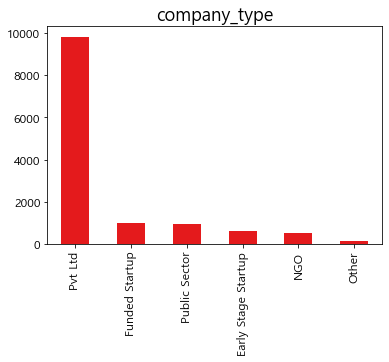

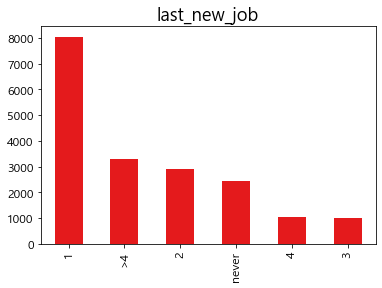

In [368]:
# 범주형 데이터 시각화
for c in train.columns:
    if c == 'enrollee_id' or c == 'city_development_index' or c == 'training_hour' or c == 'target' or c == 'training_hours' or c == 'city':
        continue
    train[c].value_counts().plot(kind='bar')
    plt.title(c)
    plt.show()

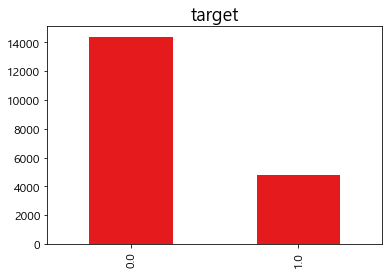

In [369]:
# y값('target')
train['target'].value_counts().plot(kind='bar')
plt.title('target')
plt.show()

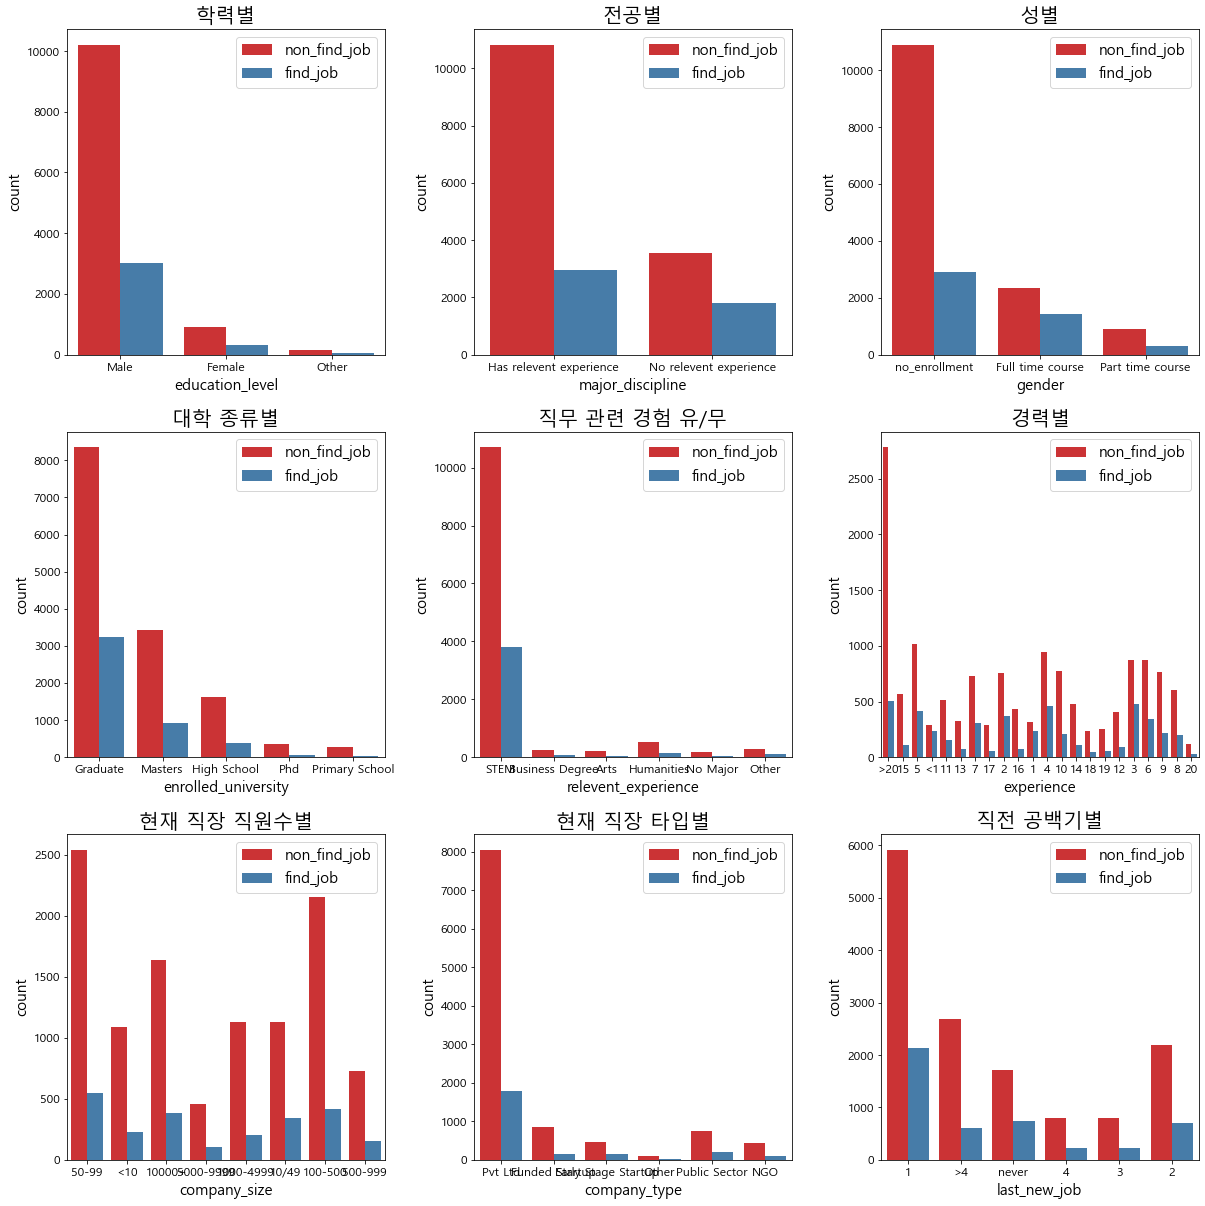

In [370]:
# 우상님 코드..! 👍👍
# 명목형(범주형) 변수와 target과의 관계
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17, 17))

sns.set_palette("Set1") #Pastel2, Dark2, Accent, Set1
axx = axes.flatten()
i = 0

for cf in category_feature:
    sns.countplot(x = cf, hue = 'target', data = train, ax = axx[i])
    i+=1

axes[0,0].set_title('학력별', fontsize=20)
axes[0,0].set_xlabel('education_level', fontsize=15)
axes[0,0].legend(['non_find_job', 'find_job'])

axes[0,1].set_title('전공별', fontsize=20)
axes[0,1].set_xlabel('major_discipline', fontsize=15)
axes[0,1].legend(['non_find_job', 'find_job'])

axes[0,2].set_title('성별', fontsize=20)
axes[0,2].set_xlabel('gender', fontsize=15)
axes[0,2].legend(['non_find_job', 'find_job'])

axes[1,0].set_title('대학 종류별', fontsize=20)
axes[1,0].set_xlabel('enrolled_university', fontsize=15)
axes[1,0].legend(['non_find_job', 'find_job'])

axes[1,1].set_title('직무 관련 경험 유/무', fontsize=20)
axes[1,1].set_xlabel('relevent_experience', fontsize=15)
axes[1,1].legend(['non_find_job', 'find_job'])

axes[1, 2].set_title('경력별', fontsize=20)
axes[1, 2].set_xlabel('experience', fontsize=15)
axes[1, 2].legend(['non_find_job', 'find_job'])

axes[2, 0].set_title('현재 직장 직원수별', fontsize=20)
axes[2, 0].set_xlabel('company_size', fontsize=15)
axes[2, 0].legend(['non_find_job', 'find_job'])

axes[2, 1].set_title('현재 직장 타입별', fontsize=20)
axes[2, 1].set_xlabel('company_type', fontsize=15)
axes[2, 1].legend(['non_find_job', 'find_job'])

axes[2, 2].set_title('직전 공백기별', fontsize=20)
axes[2, 2].set_xlabel('last_new_job', fontsize=15)
axes[2, 2].legend(['non_find_job', 'find_job'])

plt.tight_layout()
plt.show()

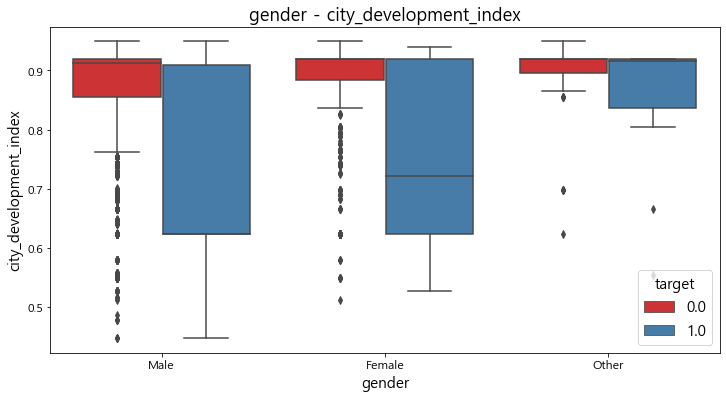

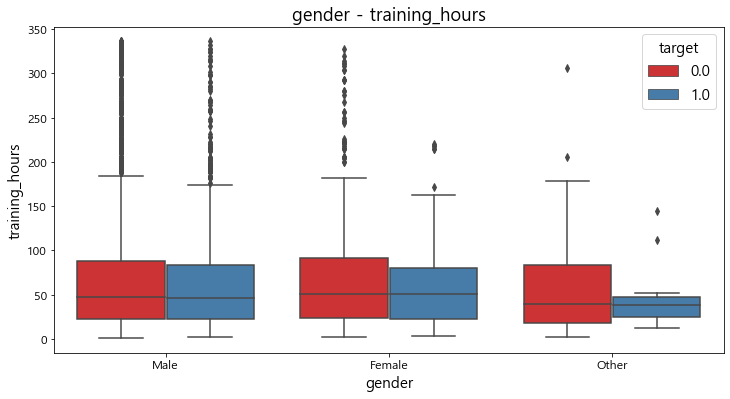

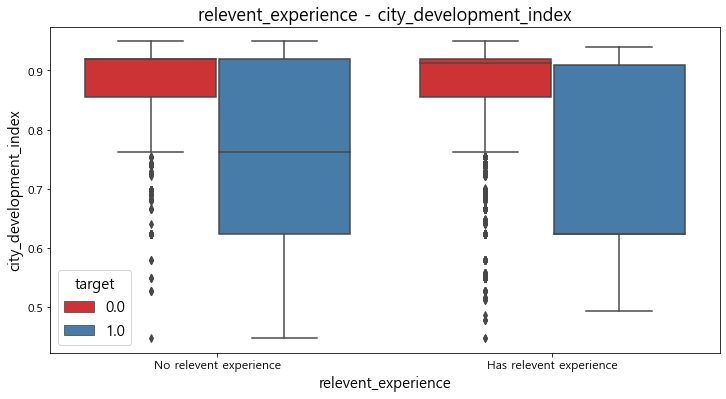

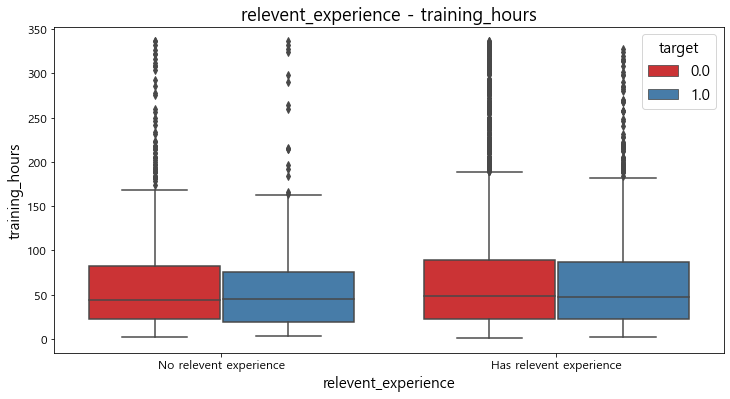

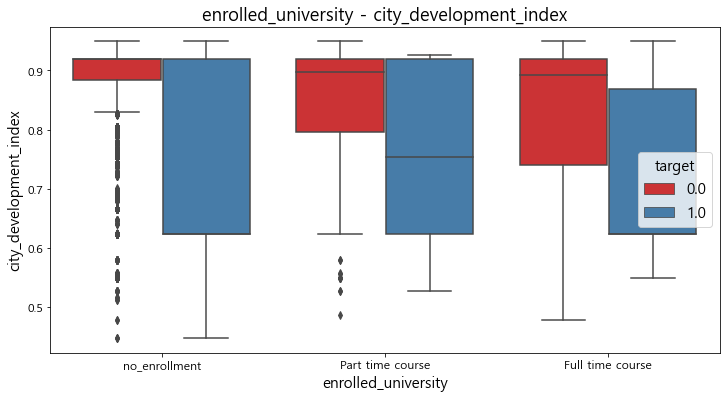

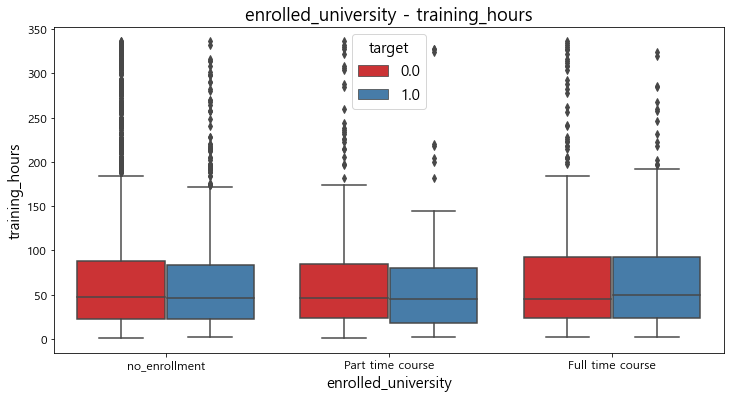

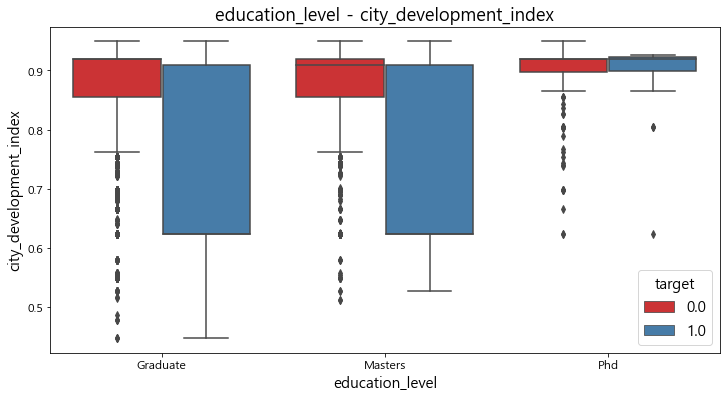

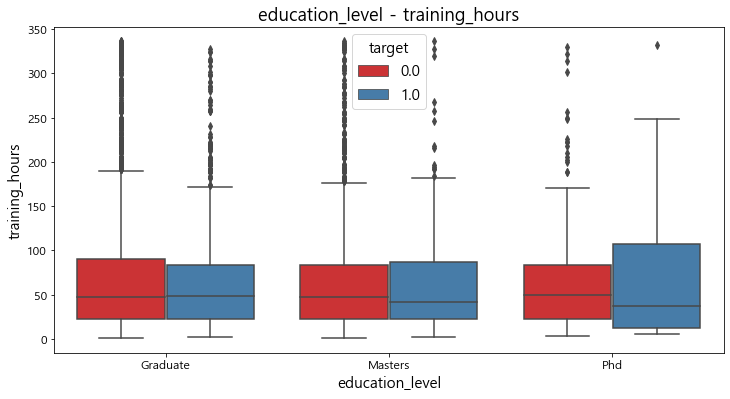

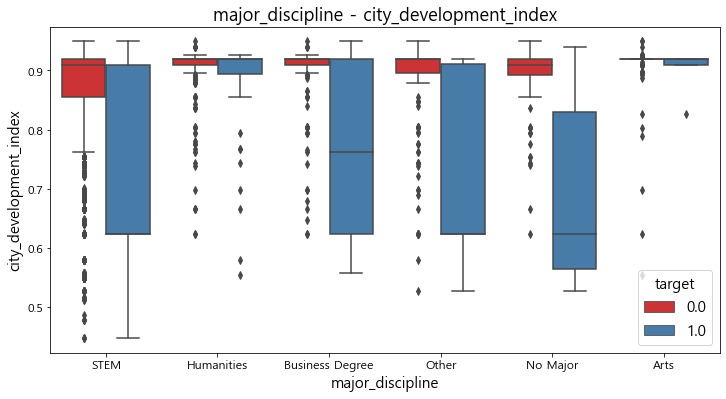

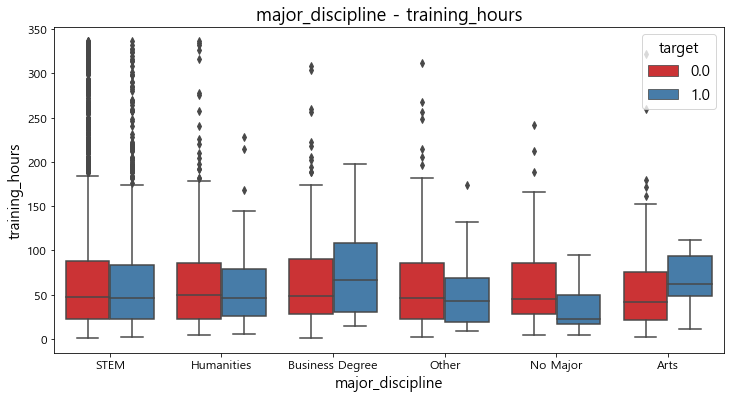

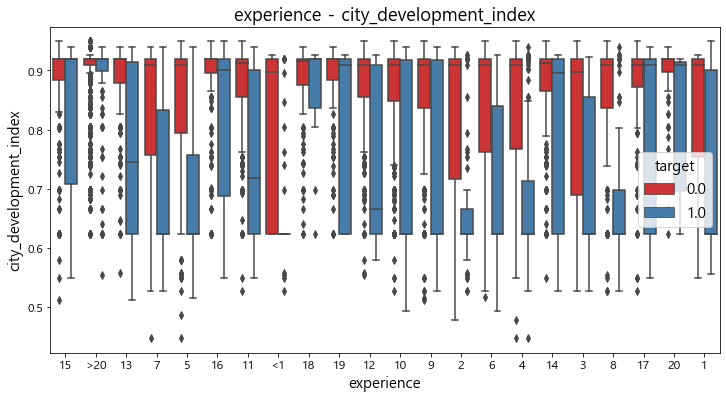

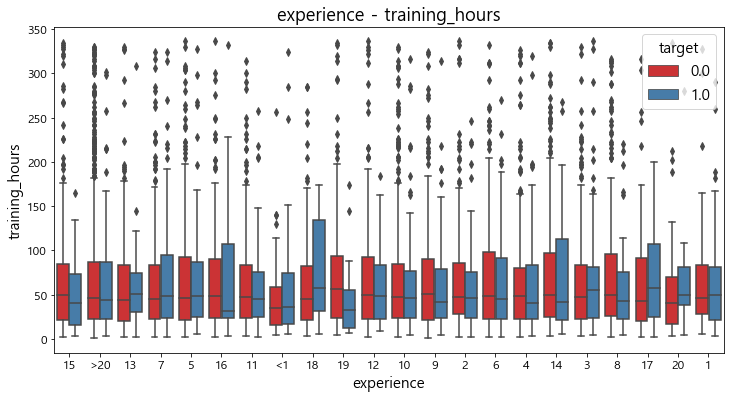

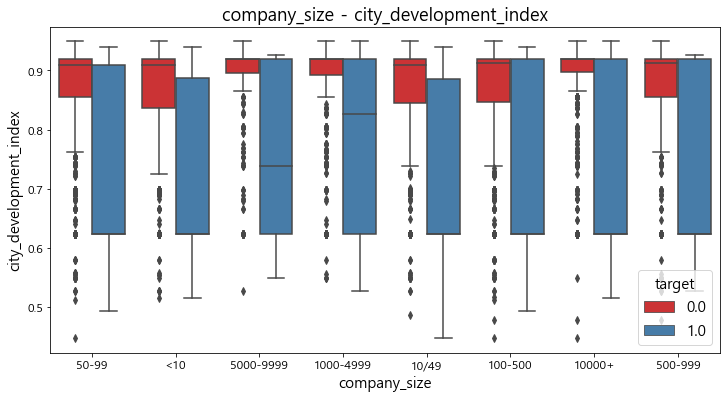

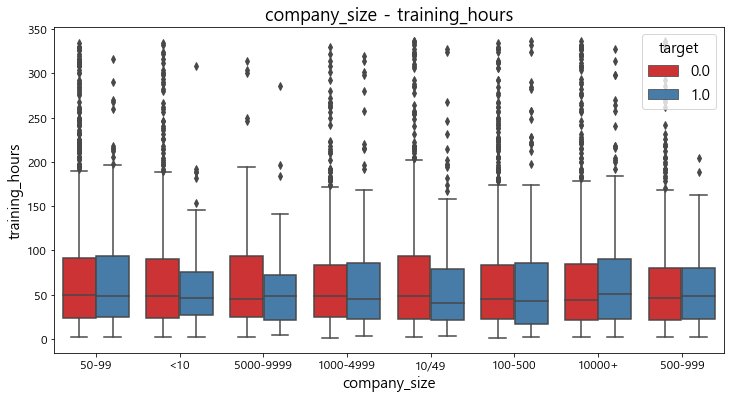

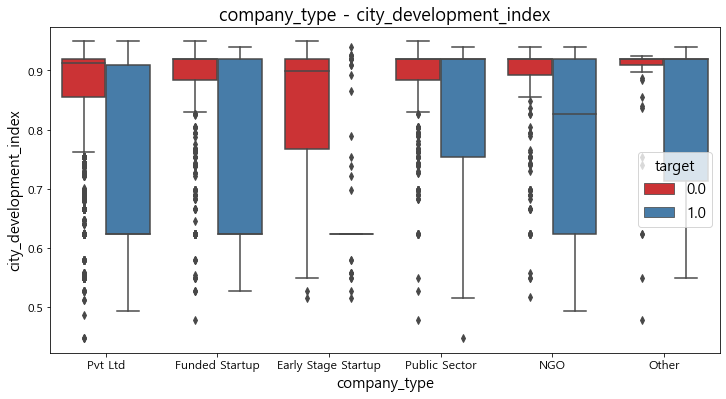

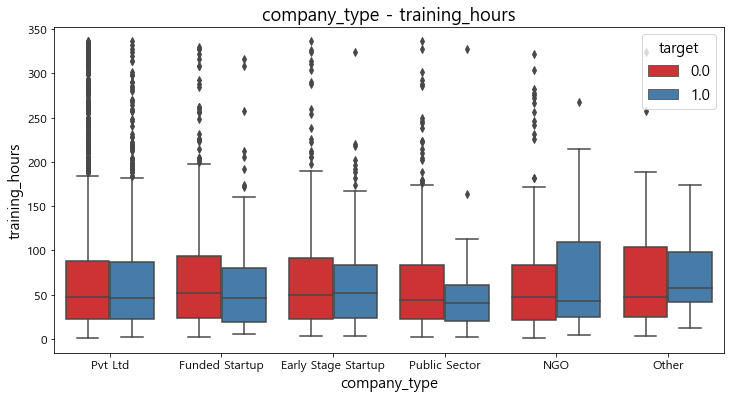

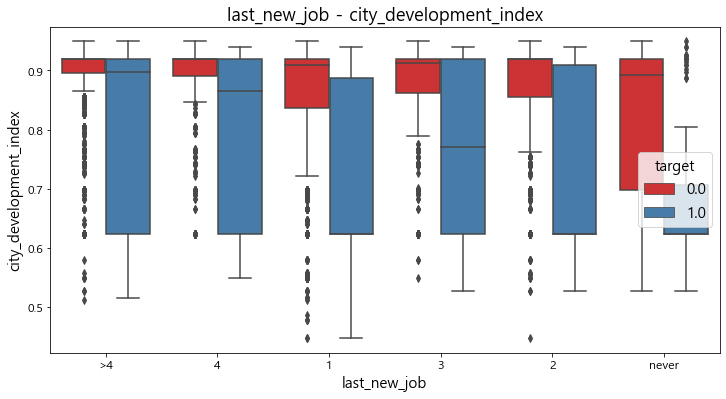

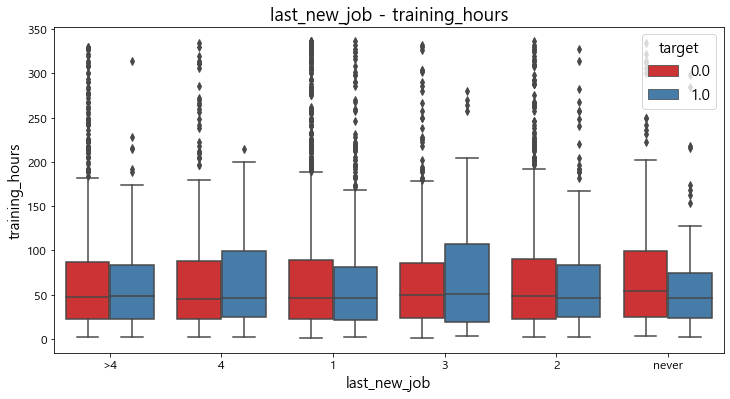

In [371]:
# 수치형(이산형), 명목형(범주형) 변수 간의 관계 탐색
for cf in category_feature:
    for nf in numerical_feature:
        plt.figure(figsize=(12,6))
        sns.boxplot(x=cf, y=nf, hue='target', data=train.dropna())
        plt.title(f"{cf} - {nf}")
        plt.show()

### 데이터 전처리
- duplicate 확인
- null값 처리
- outlier 처리

In [372]:
# 중복값 확인 -> 없음!
du = train.duplicated()
print(du.sum())
train[du]

0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [373]:
# (우선) Null값 모두 삭제
# -> 삭제한 데이터로 데이터별 중요도 파악후 컬럼별 결측치 처리를 생각해보자
# drop_na_train = train.dropna(axis=0)
# print(len(drop_na_train))
# 특정 행 또는 열을 대상으로 결측값이 들어있으면 제거
# (delete specific row or column with missing values) : df[ ].dropna()
print(len(train))
train = train.dropna(axis=0)
print(len(train))

19158
8955


In [374]:
# experience를 Categorical Type으로 변환
# 다른 변수도 가능할까? & 굳이 변경하는게 편할까?
# train['experience'] = pd.Categorical(train['experience'], categories = list(train['experience'].unique()))
# train.info()

## Preprocessing
#### Label encoding
- 범주형 : 'gender','relevent_experience', 'enrolled_university',      'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'
- 연속형: 'city_development_index','training_hours'

In [375]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [376]:
encoding_columns = ['city','gender','relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
not_encoding_columns = ['city_development_index','training_hours']

In [377]:
# 각 컬럼(Feature)마다 변환전의 고유값을 저장할 딕셔너리
enc_dict = {}

def encoding_label(x):
    le = LabelEncoder()
    r = le.fit_transform(x)
    enc_dict[x.name] = le.classes_
    return r

In [416]:
for en in encoding_columns:
    encoding_label(train[en])
# print(enc_dict)

In [379]:
d = train[encoding_columns].apply(encoding_label)
d

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
1,72,1,1,2,0,5,6,4,5,4
4,48,1,0,2,1,5,21,4,1,3
7,78,1,0,2,0,5,4,7,5,4
8,5,1,0,2,0,5,17,4,5,0
11,5,1,0,2,0,5,15,6,5,0
...,...,...,...,...,...,...,...,...,...,...
19147,60,1,1,0,0,5,0,1,5,0
19149,5,1,0,2,1,5,19,4,5,0
19150,47,0,0,2,0,5,1,1,4,2
19152,5,0,0,2,0,2,17,0,1,0


In [380]:
# encoing_columns와 not_encoding_columns 합치기
le_train = pd.concat([d, train[not_encoding_columns]], axis = 1)
le_train

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours
1,72,1,1,2,0,5,6,4,5,4,0.776,47
4,48,1,0,2,1,5,21,4,1,3,0.767,8
7,78,1,0,2,0,5,4,7,5,4,0.762,18
8,5,1,0,2,0,5,17,4,5,0,0.920,46
11,5,1,0,2,0,5,15,6,5,0,0.920,108
...,...,...,...,...,...,...,...,...,...,...,...,...
19147,60,1,1,0,0,5,0,1,5,0,0.624,52
19149,5,1,0,2,1,5,19,4,5,0,0.920,36
19150,47,0,0,2,0,5,1,1,4,2,0.920,23
19152,5,0,0,2,0,2,17,0,1,0,0.920,25


In [381]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

### One-Hot encoding
- 로지스틱회쉬, SVM, 신경망과 같은 선형 계열 모델에서 사용

In [382]:
# category_feature
from sklearn.preprocessing import OneHotEncoder
# print(category_feature)
# cf_train = train[category_feature]
# ohe = OneHotEncoder()
# X = ohe.fit_transform(cf_train)
# ohe.get_feature_names()

# X를 확인해보고 싶으니 array로 변환
# X = X.toarray()
# X_df = pd.DataFrame(X, columns=ohe.get_feature_names())
# X_df.head()

# pandas 사용, 문자열컬럼만 원핫인코딩 처리
# pd.get_dummies(train)
# pd.get_dummies(df, columns=['gender', 'items'])
ohe_train = pd.get_dummies(train.drop(columns=['enrollee_id','target']))

#columns에 인코딩 대상 컬럼들을 지정한다. => 숫자형도 인코딩된다..?

## Model
- 로지스틱 회귀
- RF/앙상블
- ExtraTreesRegressor?

In [383]:
# 모델 학습 및 예측을 진행하기 전, 문제와 정답 데이터 분리
# https://m.blog.naver.com/PostView.nhn?blogId=nomadgee&logNo=220812476823&proxyReferer=https:%2F%2Fwww.google.com%2F
# https://everyday-image-processing.tistory.com/82
# https://hong-yp-ml-records.tistory.com/28
le_train = le_train.sample(frac = 1, random_state = 0)
X = le_train
y = train['target']

In [384]:
X.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'city_development_index',
       'training_hours'],
      dtype='object')

### 의사결정트리
- 데이터의 스케일에 영향을 안 받는 모델..!

In [385]:
# 1) le_train으로 decisiong Tree 해보기
from sklearn.model_selection import train_test_split

# test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

# train/validation 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 1)
y_train.shape, y_val.shape, y_test.shape

((5373,), (1791,), (1791,))

In [386]:
# 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier

# max_depth 변경? 최적화 방법 찾아보기
tree = DecisionTreeClassifier(max_depth=5, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [387]:
# 검증
from sklearn.metrics import accuracy_score
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

print("train 정확도:", accuracy_score(y_train, pred_train))
print("val 정확도:", accuracy_score(y_val, pred_val))

train 정확도: 0.8373348222594453
val 정확도: 0.8313791178112786


In [388]:
# test set으로 최종 평가
pred_test = tree.predict(X_test)
print('test 정확도:', accuracy_score(y_test, pred_test))

test 정확도: 0.8313791178112786


In [389]:
# accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

In [390]:
print('🤔train data report')
print(classification_report(y_train, pred_train))
print('🤔test data report')
print(classification_report(y_test, pred_test))

🤔train data report
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      4484
         1.0       0.83      0.02      0.04       889

    accuracy                           0.84      5373
   macro avg       0.83      0.51      0.48      5373
weighted avg       0.84      0.84      0.77      5373

🤔test data report
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91      1494
         1.0       0.27      0.01      0.02       297

    accuracy                           0.83      1791
   macro avg       0.55      0.50      0.46      1791
weighted avg       0.74      0.83      0.76      1791



In [391]:
print('🤔train confusion matrix')
print(confusion_matrix(y_train, pred_train))
print('🤔test confusion matrix')
print(confusion_matrix(y_test, pred_test))

🤔train confusion matrix
[[4480    4]
 [ 870   19]]
🤔test confusion matrix
[[1486    8]
 [ 294    3]]


### Feature(컬럼) 중요도 조회

In [392]:
# print(X_train.columns)
# tree.feature_importances_ #.size
print(dict(zip(X_train.columns, tree.feature_importances_)))
# 'training_hours', 'company_type', 'training_hours'

{'city': 0.17458463730406062, 'gender': 0.0, 'relevent_experience': 0.0, 'enrolled_university': 0.0, 'education_level': 0.078405362672489, 'major_discipline': 0.0, 'experience': 0.0, 'company_size': 0.029707734270611685, 'company_type': 0.18403224725267603, 'last_new_job': 0.07152493770678393, 'city_development_index': 0.08593359868912379, 'training_hours': 0.3758114821042551}


### 의사결정트리-OneHotEncoding

In [393]:
# Decision  Tree _ ohe
ohe_train = ohe_train.sample(frac = 1, random_state = 0)
X = ohe_train
y = train['target']

from sklearn.model_selection import train_test_split
# test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)
# train/validation 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 1)
# y_train.shape, y_val.shape, y_test.shape

# 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier
# max_depth 변경? 최적화 방법 찾아보기
tree = DecisionTreeClassifier(max_depth=5, random_state=1)
tree.fit(X_train, y_train)

# 검증
from sklearn.metrics import accuracy_score
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

print("train 정확도:", accuracy_score(y_train, pred_train))
print("val 정확도:", accuracy_score(y_val, pred_val))

# test set으로 최종 평가
pred_test = tree.predict(X_test)
print('test 정확도:', accuracy_score(y_test, pred_test))

# print(X_train.columns)

# tree.feature_importances_ #.size
fi = list(zip(X_train.columns, tree.feature_importances_))
fi = sorted(fi,key= lambda x:x[1], reverse=True)
print(fi[0:10])
# 'training_hours', 'city_city_18', 'city_city_91'

train 정확도: 0.8395682114275079
val 정확도: 0.8235622557230597
test 정확도: 0.8252372975991067
[('training_hours', 0.233063841986873), ('last_new_job_never', 0.07377340644525762), ('city_city_114', 0.06612317690961139), ('city_city_16', 0.0574313484443601), ('city_city_103', 0.05427263660391458), ('company_size_10000+', 0.045630540957568355), ('experience_4', 0.04223666413257028), ('enrolled_university_Part time course', 0.041731771283384365), ('company_size_100-500', 0.03859387491833926), ('experience_11', 0.036935706285972314)]


### 앙상블 : RF

In [411]:
from sklearn.ensemble import RandomForestClassifier
ohe_train = ohe_train.sample(frac = 1, random_state = 0)
X = ohe_train
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 1)

rf = RandomForestClassifier(n_estimators=200, #DecisionTree 개수
                            max_features=7, #각각의 tree학습시 전달할 feature(컬럼)의 개수. 
                            max_depth=5,
                            n_jobs=-1, 
                            random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=200, n_jobs=-1,
                       random_state=1)

In [412]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

In [413]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8345430857993672, 0.8341708542713567)

In [415]:
# feature 중요도
fi_s = pd.Series(rf.feature_importances_, index=X_train.columns)
fi_s.sort_values(ascending=False)

training_hours            0.076471
city_development_index    0.029867
city_city_13              0.022428
company_size_50-99        0.021026
last_new_job_1            0.019839
                            ...   
city_city_127             0.000000
city_city_129             0.000000
city_city_9               0.000000
city_city_155             0.000000
city_city_25              0.000000
Length: 177, dtype: float64

## 데이터 정규화
- 트리계열을 제외한 대부분의 머신러닝 알고리즘들이 피처의 스케일에 영향을 받는다
    - 선형모델, SVM 모델, 신경망 모델 등

In [394]:
ohe_train

,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
13724,0.624,149,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5332,0.910,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12956,0.920,27,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1212,0.764,48,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
17345,0.920,6,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,0.920,52,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16869,0.920,98,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
10285,0.939,65,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6865,0.550,42,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [395]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_ohe_train = ohe_train[['city_development_index','training_hours']]
print(numeric_ohe_train)
numeric_ohe_train[:] = scaler.fit_transform(numeric_ohe_train[:])
print(numeric_ohe_train)

       city_development_index  training_hours
13724                   0.624             149
5332                    0.910              26
12956                   0.920              27
1212                    0.764              48
17345                   0.920               6
...                       ...             ...
9290                    0.920              52
16869                   0.920              98
10285                   0.939              65
6865                    0.550              42
5728                    0.920              40

[8955 rows x 2 columns]
       city_development_index  training_hours
13724                0.351297        0.441791
5332                 0.922156        0.074627
12956                0.942116        0.077612
1212                 0.630739        0.140299
17345                0.942116        0.014925
...                       ...             ...
9290                 0.942116        0.152239
16869                0.942116        0.289552
10285    

In [396]:
ohe_train = ohe_train.drop(columns = ['city_development_index','training_hours'])
ohe_train = pd.concat([numeric_ohe_train, ohe_train], axis = 1)
ohe_train

,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
13724,0.351297,0.441791,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5332,0.922156,0.074627,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12956,0.942116,0.077612,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1212,0.630739,0.140299,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
17345,0.942116,0.014925,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,0.942116,0.152239,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16869,0.942116,0.289552,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
10285,0.980040,0.191045,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6865,0.203593,0.122388,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### LogisticRegression

In [402]:
# Decision  Tree _ ohe
ohe_train = ohe_train.sample(frac = 1, random_state = 0)
X = ohe_train
y = train['target']

from sklearn.model_selection import train_test_split
# test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)
# train/validation 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 1)
y_train.shape, y_val.shape, y_test.shape

# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(C=1, random_state=1)
lr.fit(X_train, y_train)

# 검증
pred_train = lr.predict(X_train)
pred_val = lr.predict(X_val)

print("train 정확도:", accuracy_score(y_train, pred_train))
print("val 정확도:", accuracy_score(y_val, pred_val))

# test set으로 최종 평가
pred_test = lr.predict(X_test)
print('test 정확도:', accuracy_score(y_test, pred_test))

print(classification_report(y_test, pred_test))

train 정확도: 0.8345430857993672
val 정확도: 0.8341708542713567
test 정확도: 0.8336125069793412
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1494
         1.0       0.00      0.00      0.00       297

    accuracy                           0.83      1791
   macro avg       0.42      0.50      0.45      1791
weighted avg       0.70      0.83      0.76      1791



In [397]:
# 최종모델을 선택하고 사용할 피쳐를 선택하기에 앞서 cross validation을 통해 어떠한 경우가 가장 좋은 성능을 내는지 판단하는 과정
def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    difference = log_predict - log_actual
    difference = np.square(difference)
    mean_difference = difference.mean()
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)

validation_model = ExtraTreesRegressor(n_jobs = -1, random_state = 4)
cv = KFold(2, shuffle=True, random_state=4)
scores = cross_val_score(validation_model, X_train, y_train, cv=cv, scoring=rmsle_scorer)

print("교차 검증 점수: {}". format(scores))
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 점수: [0.32915808 0.32486463]
교차 검증 평균 점수: 0.33


In [398]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores2 = cross_val_score(logreg, X_train, y_train)

print(f'cross-val-score : {scores2}')
print(f'cross-val-score.mean : {scores2.mean()}')

cross-val-score : [0.8344186  0.8344186  0.8344186  0.83519553 0.83426443]
cross-val-score.mean : 0.834543155341908


In [ ]:
# 변수 선택/추출
# https://wikidocs.net/16882